## Keyword-Based News Classification Model - Task

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
import re

In [5]:
DATA_PATH = "C:/Users/bbuser/Desktop/python_sprint 8/News_Category_Dataset_v3.json"

# Load JSON lines file
data = pd.read_json(DATA_PATH, lines=True)

# Keep only category + short_description
data = data[['category', 'short_description']]
data.head()

,category,short_description
0,U.S. NEWS,Health experts said it is too early to predict...
1,U.S. NEWS,He was subdued by passengers and crew when he ...
2,COMEDY,"""Until you have a dog you don't understand wha..."
3,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [6]:
TARGET_CATEGORIES = ["POLITICS", "TRAVEL", "SPORTS", "HOME & LIVING"]

df = data[data['category'].isin(TARGET_CATEGORIES)].copy()

# Balance: take 1000 samples per category
df_bal = df.groupby("category").apply(
    lambda x: x.sample(n=1000, random_state=42)
).reset_index(drop=True)

df_bal['category'].value_counts()

C:\Users\bbuser\AppData\Local\Temp\ipykernel_6372\136586334.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_bal = df.groupby("category").apply(


category
HOME & LIVING    1000
POLITICS         1000
SPORTS           1000
TRAVEL           1000
Name: count, dtype: int64

In [7]:
train_df, test_df = train_test_split(
    df_bal, test_size=0.2, stratify=df_bal['category'], random_state=42
)

print("Train size:", len(train_df))
print("Test size :", len(test_df))

Train size: 3200
Test size : 800


In [9]:
stopwords = set(STOPWORDS)

def tokenize(text):
    text = text.lower()
    words = re.findall(r"[a-z]+", text)  # keep only alphabetic words
    words = [w for w in words if w not in stopwords and len(w) > 2]
    return words

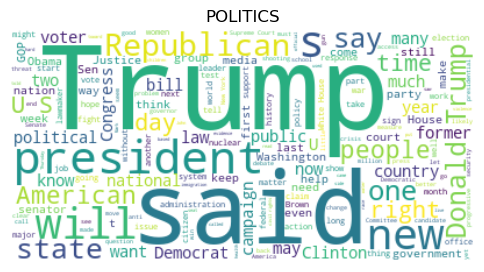

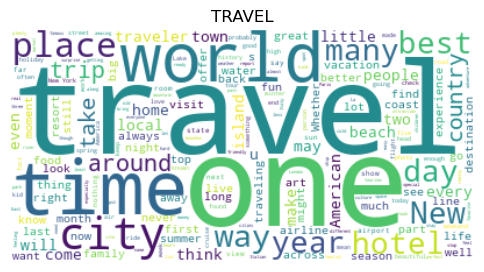

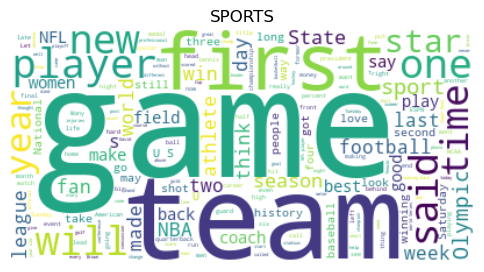

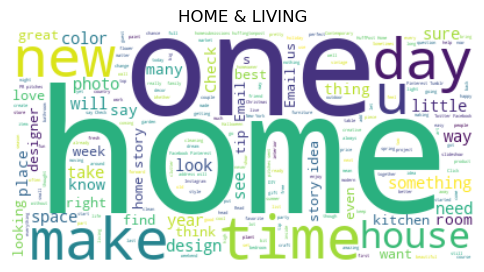

In [10]:
for cat in TARGET_CATEGORIES:
    texts = train_df[train_df['category'] == cat]['short_description']
    words = " ".join(texts)
    wc = WordCloud(stopwords=stopwords, background_color="white").generate(words)
    
    plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(cat)
    plt.show()

In [11]:
freq_words = {}

for cat in TARGET_CATEGORIES:
    texts = train_df[train_df['category'] == cat]['short_description']
    tokens = []
    for t in texts:
        tokens.extend(tokenize(t))
    counter = Counter(tokens)
    freq_words[cat] = counter
    print(cat, counter.most_common(10))  # show top 10

POLITICS [('trump', 119), ('president', 68), ('said', 59), ('will', 48), ('new', 38), ('donald', 36), ('one', 35), ('state', 28), ('republican', 28), ('people', 28)]
TRAVEL [('travel', 77), ('one', 71), ('world', 67), ('city', 58), ('time', 56), ('new', 52), ('many', 41), ('best', 39), ('around', 37), ('trip', 34)]
SPORTS [('game', 44), ('first', 38), ('team', 34), ('will', 34), ('said', 34), ('one', 33), ('time', 29), ('football', 28), ('star', 25), ('new', 25)]
HOME & LIVING [('home', 131), ('one', 66), ('will', 52), ('new', 46), ('check', 42), ('time', 41), ('say', 40), ('make', 39), ('house', 37), ('something', 36)]


In [12]:
def classify(text, top_words_dict, N=10):
    tokens = set(tokenize(text))
    overlaps = {}
    for cat in TARGET_CATEGORIES:
        topN = {w for w, _ in freq_words[cat].most_common(N)}
        overlaps[cat] = len(tokens & topN)
    max_overlap = max(overlaps.values())
    if max_overlap == 0:
        return "unknown"
    best = [c for c, v in overlaps.items() if v == max_overlap]
    return best[0] if len(best) == 1 else "unknown"

In [13]:
results = []

for N in [10, 20, 30, 50]:
    preds = [classify(txt, freq_words, N) for txt in test_df['short_description']]
    acc = accuracy_score(test_df['category'], preds)
    results.append((N, acc))
    print(f"Top {N} words -> Accuracy: {acc:.4f}")

Top 10 words -> Accuracy: 0.2087
Top 20 words -> Accuracy: 0.2575
Top 30 words -> Accuracy: 0.2812
Top 50 words -> Accuracy: 0.3000


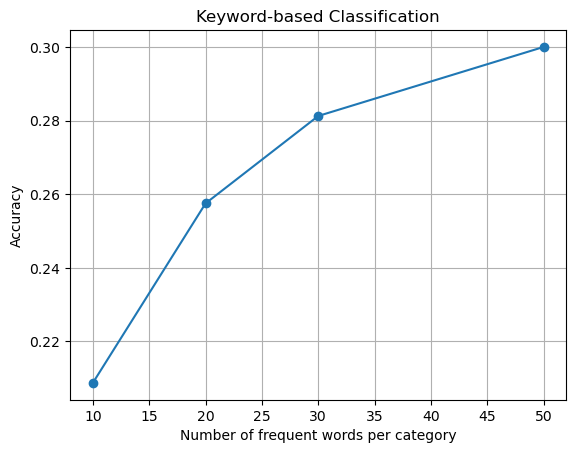

In [14]:
N_vals, acc_vals = zip(*results)
plt.plot(N_vals, acc_vals, marker="o")
plt.xlabel("Number of frequent words per category")
plt.ylabel("Accuracy")
plt.title("Keyword-based Classification")
plt.grid(True)
plt.show()

## Task Is Done !